In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
import scipy.stats as sts

In [2]:
def T_normal(n, k):
    nums = []
    for i in range(n):
        nums.append(sum([random.random() * ks for ks in k]))
    return nums

In [3]:
def M_theor(k):
    return sum([ks/2 for ks in k]) 

def D_theor(k):
    return sum([ks**2/12 for ks in k])

def S_theor(D_theor):
    return list(math.sqrt(D) for D in D_theor)

In [4]:
def M_practic(seq):
    return sum(seq)/len(seq)

def D_practic(seq):
    n = len(seq) - 1
    M = M_practic(seq)
    var = sum((x - M) ** 2 for x in seq) / n 
    return var

def S_practic(D):
    return [math.sqrt(d) for d in D]

In [11]:
k = [5, 2, 7, 1]

In [12]:
N = [10, 20, 50, 100, 200, 500, 1000]
nums = []

for n in N:
    nums.append(T_normal(n, k))

In [13]:
M = []
D = []
S = []

for seq in nums:
    M.append(M_theor(k))
    D.append(D_theor(k))
    S.append(S_theor(k))
S = S_theor(D)

In [18]:
def frequencies(data, left_bound, right_bound, num_bins, M, S, M_theor, S_theor):
    bins = np.linspace(left_bound, right_bound, num_bins + 1)
    
    counts, _ = np.histogram(data, bins=bins)
        
    total_count = len(data)
    freqs = counts / total_count

    area = np.sum(freqs * np.diff(bins))
    print(f'Площадь гистограммы: {area}')
    
    plt.figure()
    plt.bar(bins[:-1], freqs, tick_label=bins[:-1])
    
    x = np.linspace(0, sum(k), 100)
    y = (1 / (S * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - M) / S) ** 2)

    y_1 = (1 / (S_theor * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - M) / S_theor) ** 2)
    plt.plot(x, y_1, 'y')

    plt.plot(x, y, 'r')
    
    return freqs

In [19]:
M_pr = []
D_pr = []
S_pr = []

for seq in nums:
    M_pr.append(M_practic(seq))
    D_pr.append(D_practic(seq))
    

S_pr = (S_practic(D_pr))

Площадь гистограммы: 0.9999999999999999
Площадь гистограммы: 1.0000000000000002
Площадь гистограммы: 1.0
Площадь гистограммы: 0.9999999999999999
Площадь гистограммы: 1.0
Площадь гистограммы: 1.0
Площадь гистограммы: 1.0


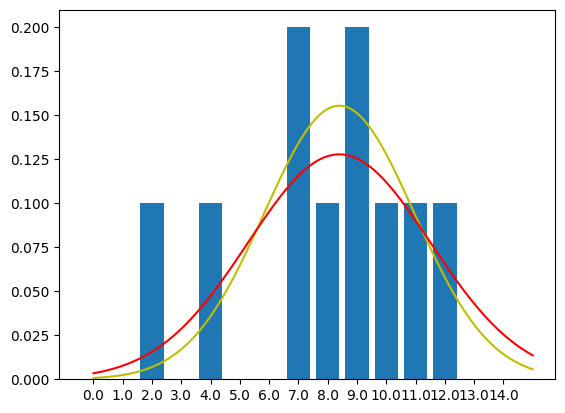

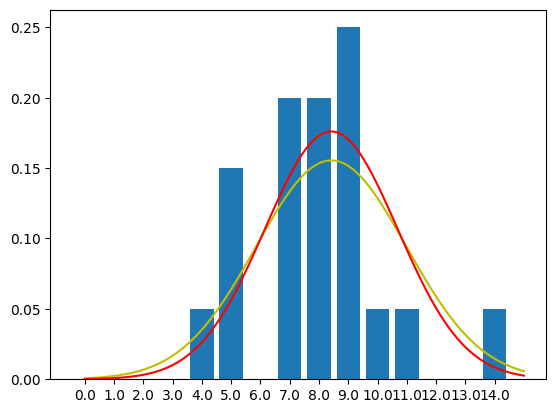

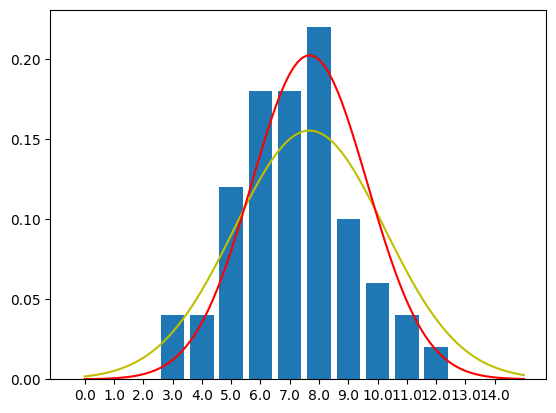

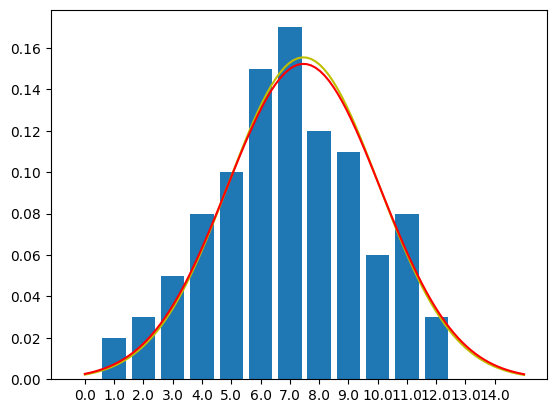

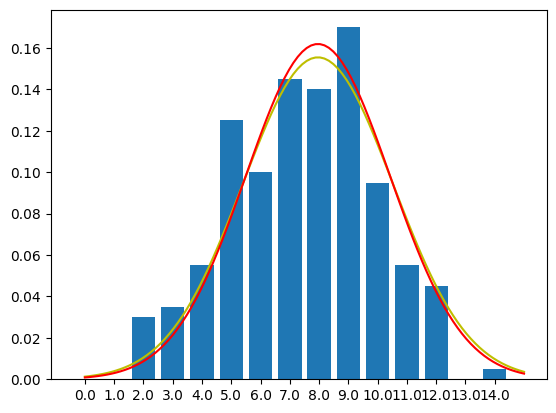

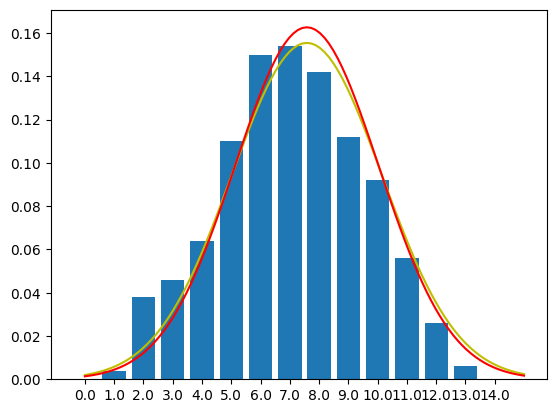

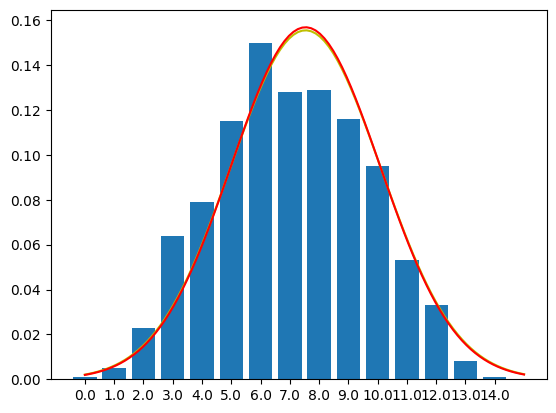

In [20]:
for i in range(len(nums)):
    frequencies(nums[i], 0, sum(k), 15, M_pr[i], S_pr[i], M[i], S[i])

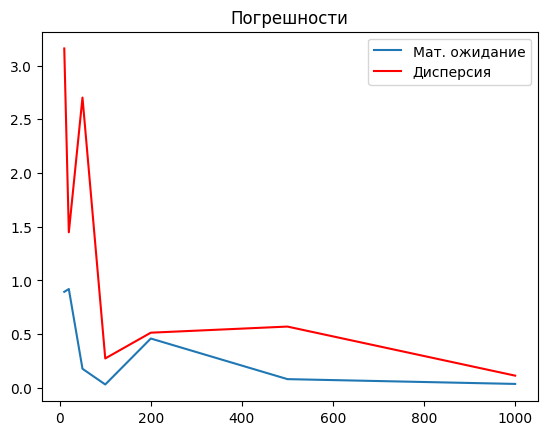

In [17]:
m_errors = []
d_errors = []
for i in range(len(M)):
    m_error = abs(M[i] - M_pr[i])
    d_error = abs(D[i] - D_pr[i])
    
    m_errors.append(m_error)
    d_errors.append(d_error)

plt.title('Погрешности')
plt.plot(N, m_errors, label='Мат. ожидание')
plt.plot(N, d_errors, 'r', label='Дисперсия')
plt.legend()